In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC

In [2]:
df = pd.read_csv('../data/clean_train.csv')

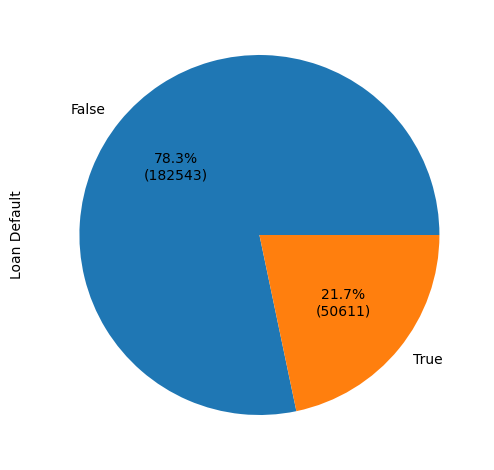

In [3]:
def autopct_format(values): # code by Santiago Domínguez Collado
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

df['loan_default'].astype(bool).value_counts().plot.pie(autopct=autopct_format(df['loan_default'].astype(bool).value_counts()))
plt.ylabel('Loan Default')

# Our classes are imbalanced
# We will apply SMOTENC to balance our classes

plt.tight_layout()
plt.savefig('../visuals/imbalanced_classes.png')

In [4]:
X = df.drop(columns = 'loan_default')
y = df['loan_default']

cat_features = []

for i, j in list(enumerate(X.columns)):
    if j in ['branch_id', 'supplier_id', 'manufacturer_id', 'current_pincode_id', 'state_id','employee_code_id',
             'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag','driving_flag', 'passport_flag',
             'employment_self', 'employment_none','cns_score_category','cns_score_unreliable']:
        cat_features.append(i)

In [5]:
smote_nc = SMOTENC(categorical_features = cat_features)

X_resampled, y_resampled = smote_nc.fit_resample(X, y)

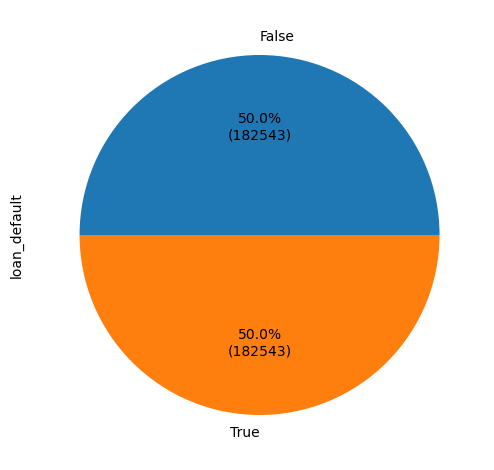

In [6]:
df_resampled = pd.concat([X_resampled, y_resampled], axis = 1)

df_resampled['loan_default'].astype(bool).value_counts().plot.pie(autopct=autopct_format(df_resampled['loan_default'].astype(bool).value_counts()))

plt.tight_layout()
plt.savefig('../visuals/imbalanced_classes.png')

### Feature Selection
___

In [7]:
continuous = ['disbursed_amount', 'asset_cost', 'ltv', 'perform_cns_score', 'pri_no_of_accts', 'pri_active_accts',
              'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount', 'sec_no_of_accts',
              'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount',
              'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
              'no_of_inquiries']

binaries = ['mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag', 'employment_self',
            'employment_none', 'cns_score_unreliable']

categorical = ['branch_id', 'supplier_id', 'manufacturer_id', 'current_pincode_id', 'state_id', 'employee_code_id']

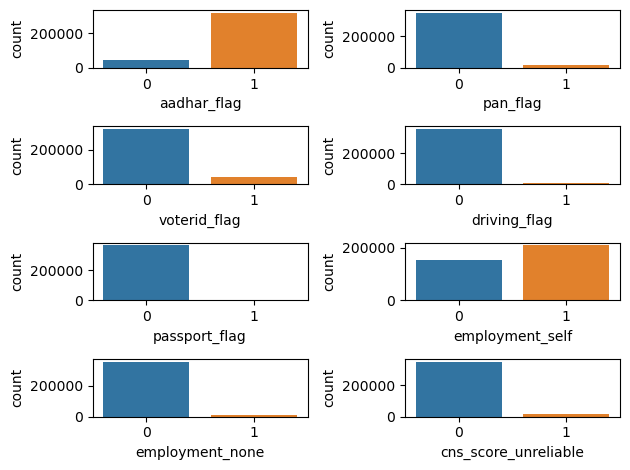

In [24]:
fig, ax =plt.subplots(4,2)

sns.countplot(x = df_resampled['aadhar_flag'], ax=ax[0][0])
sns.countplot(x = df_resampled['pan_flag'], ax=ax[0][1])
sns.countplot(x = df_resampled['voterid_flag'], ax=ax[1][0])
sns.countplot(x = df_resampled['driving_flag'], ax=ax[1][1])
sns.countplot(x = df_resampled['passport_flag'], ax=ax[2][0])
sns.countplot(x = df_resampled['employment_self'], ax=ax[2][1])
sns.countplot(x = df_resampled['employment_none'], ax=ax[3][0])
sns.countplot(x = df_resampled['cns_score_unreliable'], ax=ax[3][1])


plt.tight_layout()

plt.savefig('../visuals/flags_dist')

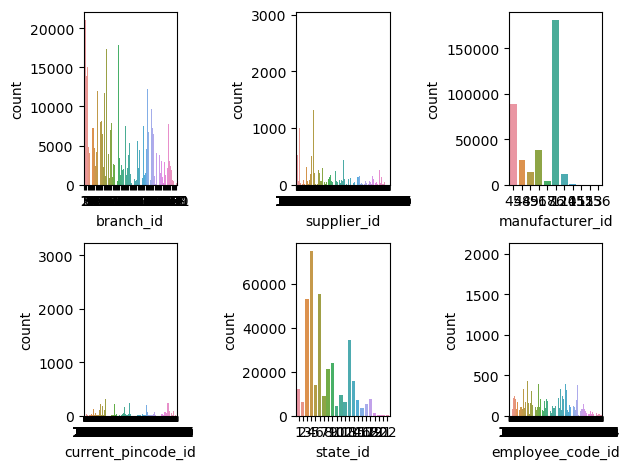

In [25]:
fig, ax = plt.subplots(2, 3, squeeze = False)
sns.countplot(data = df_resampled, x = categorical[0], ax = ax[0][0])
sns.countplot(data = df_resampled, x = categorical[1], ax = ax[0][1])
sns.countplot(data = df_resampled, x = categorical[2], ax = ax[0][2])
sns.countplot(data = df_resampled, x = categorical[3], ax = ax[1][0])
sns.countplot(data = df_resampled, x = categorical[4], ax = ax[1][1])
sns.countplot(data = df_resampled, x = categorical[5], ax = ax[1][2])

plt.tight_layout()

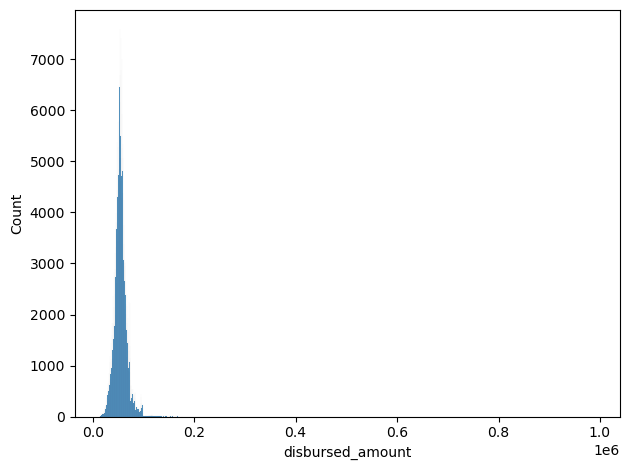

In [26]:
sns.histplot(df_resampled['disbursed_amount'])
plt.tight_layout()
plt.savefig('../visuals/disbursed_amount_dist_0.png')

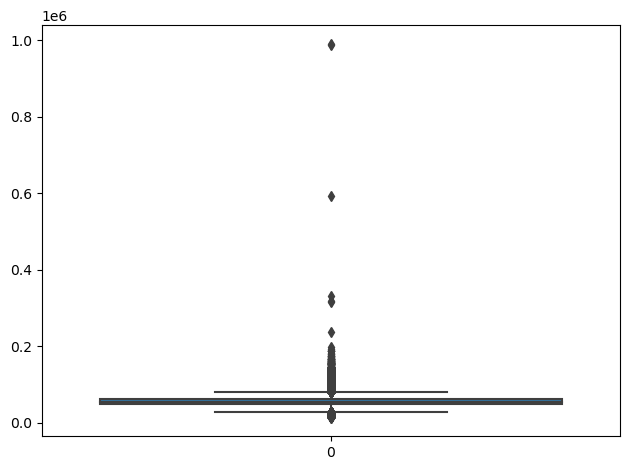

In [27]:
sns.boxplot(data = df_resampled['disbursed_amount'])
plt.tight_layout()
plt.savefig('../visuals/disbursed_amount_box_0.png')

In [28]:
data_mean = df_resampled['disbursed_amount'].describe()[1]
data_std = df_resampled['disbursed_amount'].describe()[2]
lower = data_mean - (data_std * 3)
upper = data_mean + (data_std * 3)

df_resampled['disbursed_amount_treated'] = df_resampled['disbursed_amount'].map(lambda i: data_mean if i <= lower or i >= upper else i)

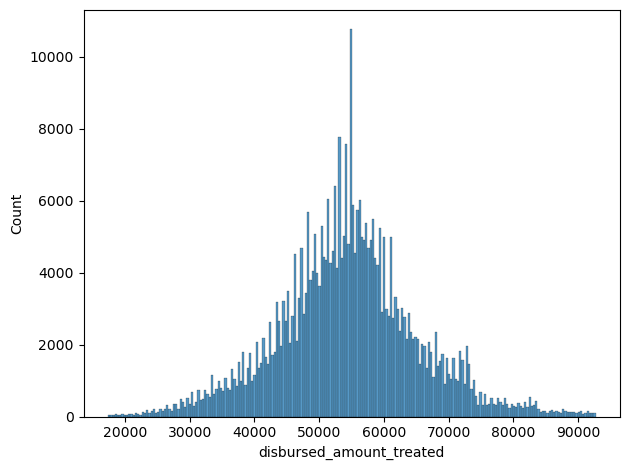

In [29]:
sns.histplot(df_resampled['disbursed_amount_treated'])
plt.tight_layout()
plt.savefig('../visuals/disbursed_amount_dist_1.png')

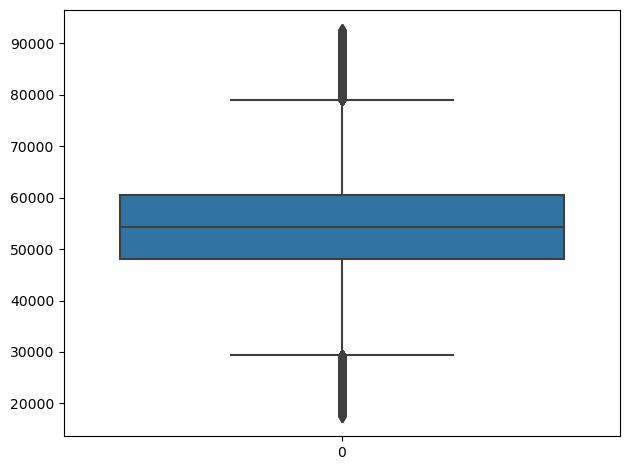

In [30]:
sns.boxplot(data = df_resampled['disbursed_amount_treated'])
plt.tight_layout()
plt.savefig('../visuals/disbursed_amount_box_1.png')

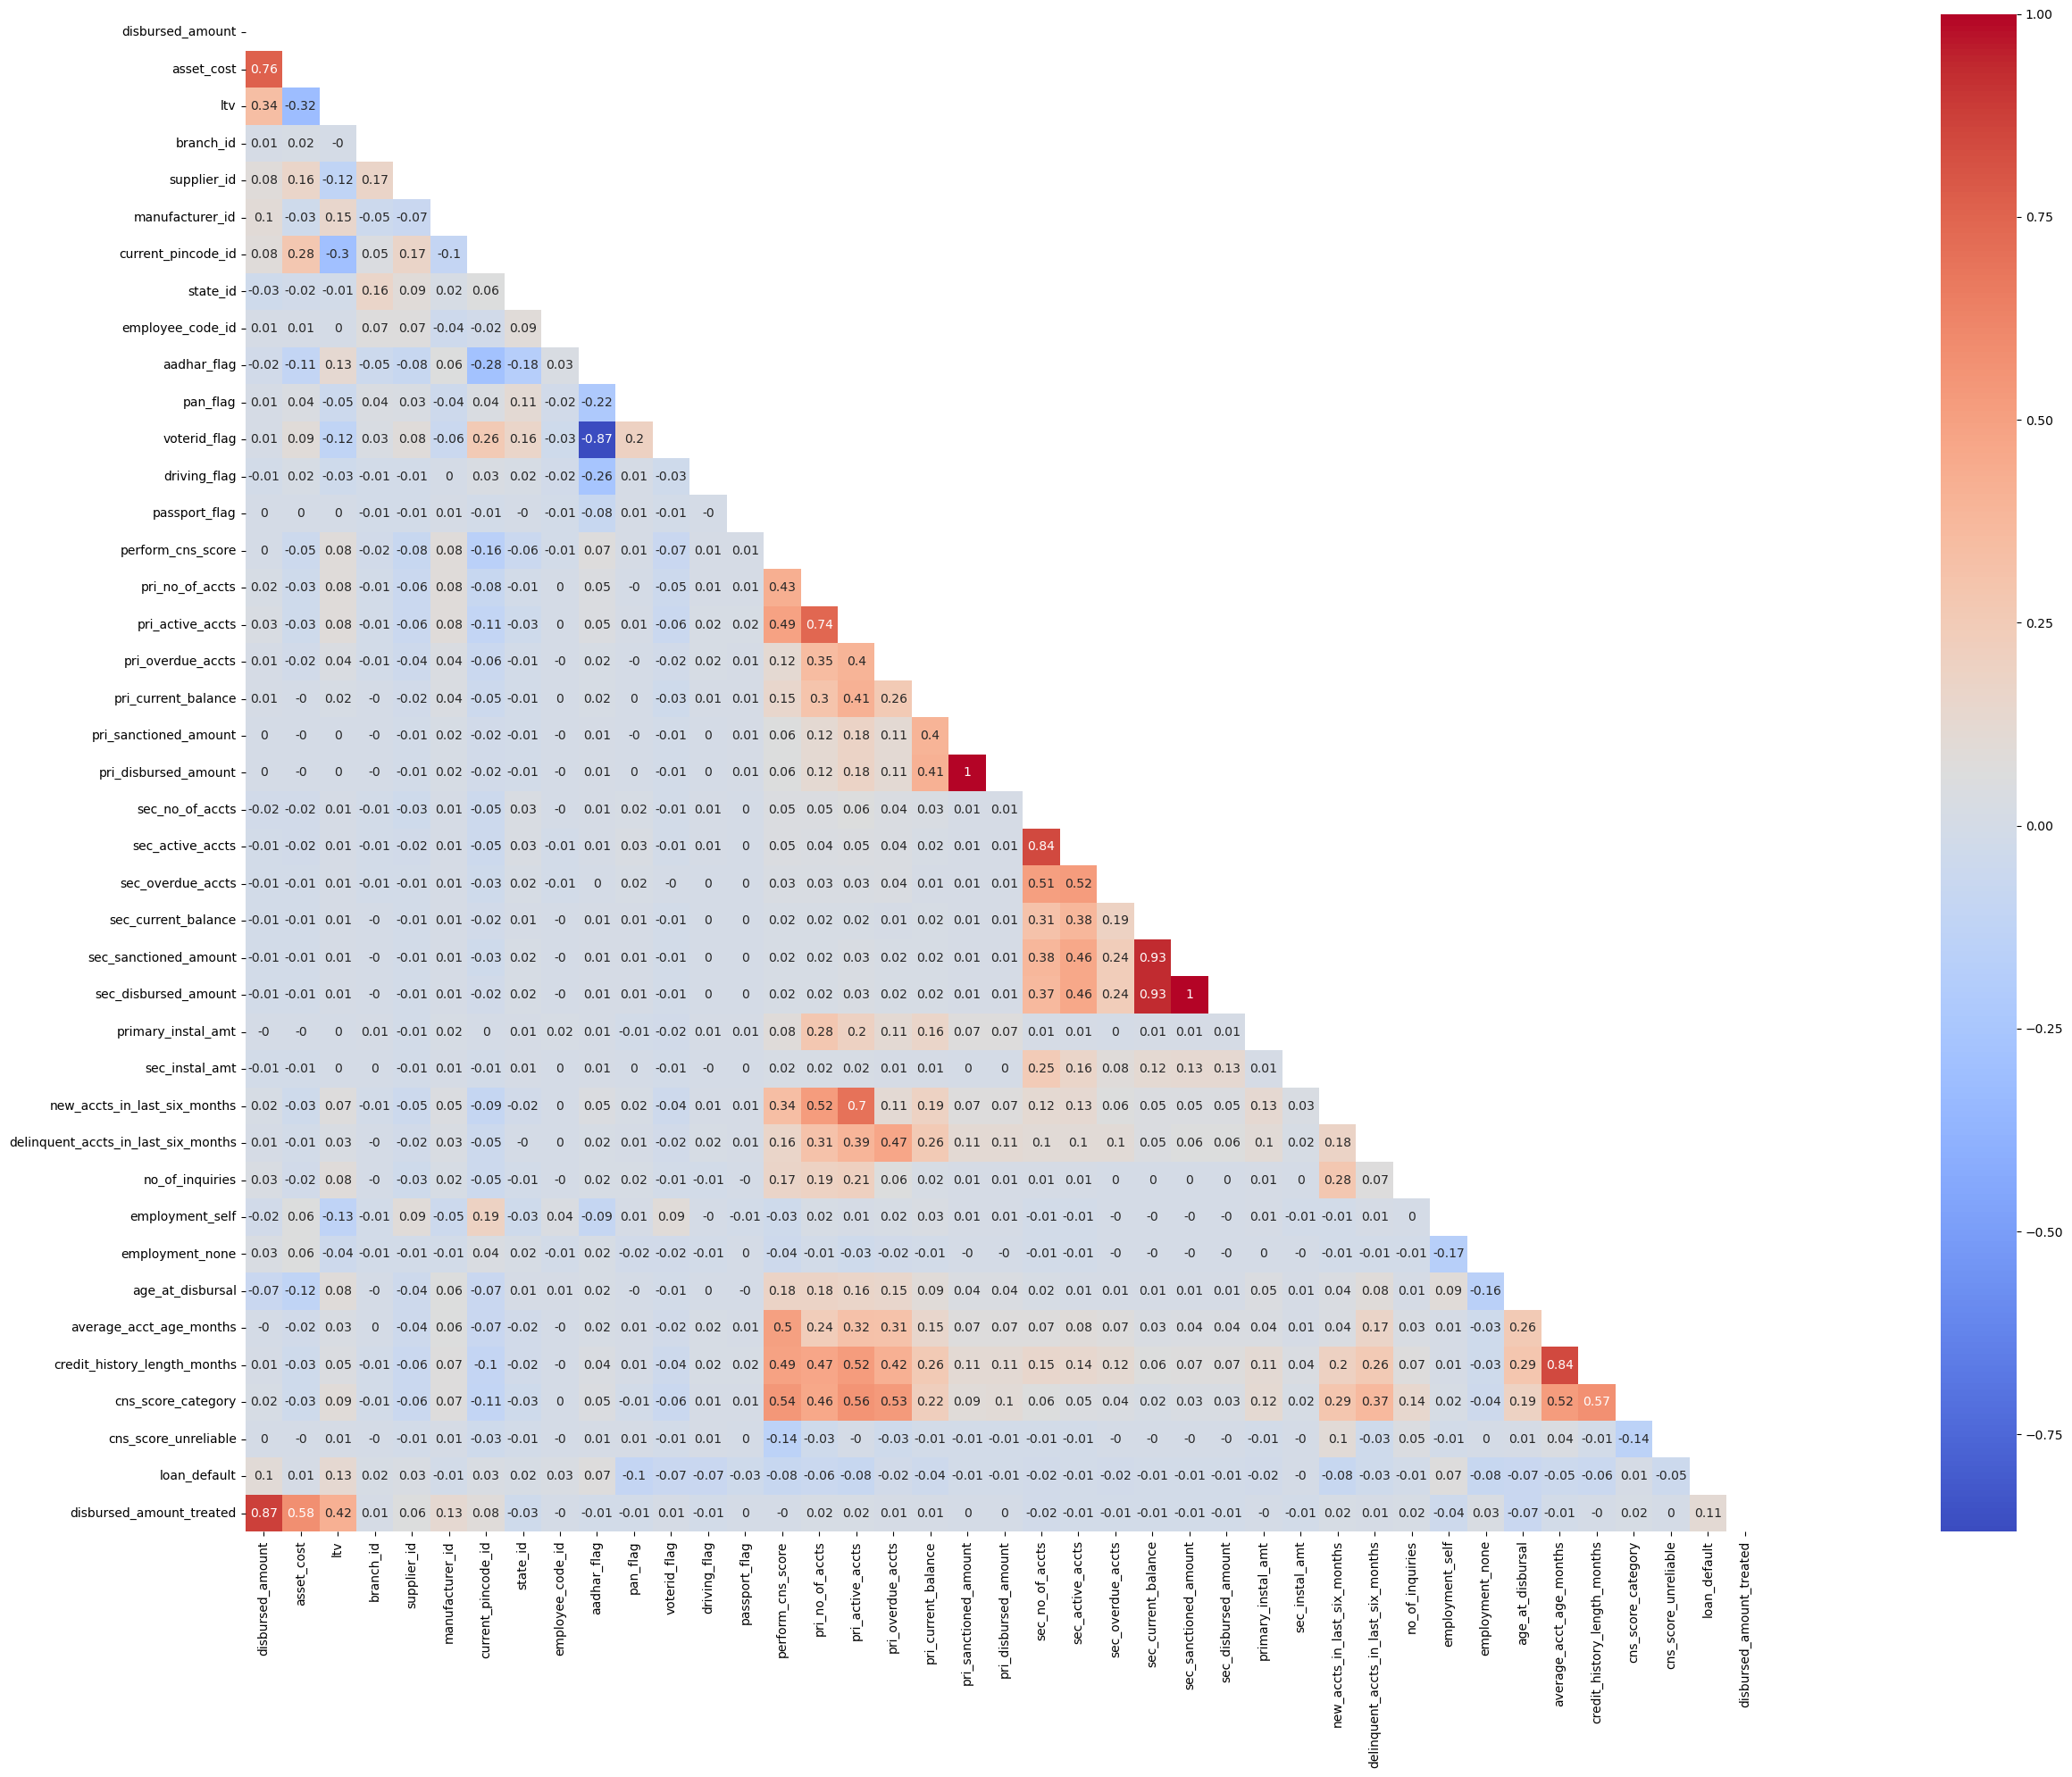

In [31]:
plt.figure(figsize=(40,20))

corr = round(df_resampled.corr(), 2)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            mask = mask,
            square = True,
            cmap = 'coolwarm',
            annot = True)

plt.tight_layout()
plt.savefig('../visuals/heatmap.png')

In [36]:
features = ['disbursed_amount_treated', 'pri_active_accts',  'pri_overdue_accts', 'sec_active_accts', 'sec_overdue_accts',
            'sec_current_balance', 'perform_cns_score', 'no_of_inquiries', 'age_at_disbursal', 'cns_score_unreliable',
            'credit_history_length_months', 'primary_instal_amt', 'sec_instal_amt', 'loan_default']
            

In [37]:
df_resampled[features]

,disbursed_amount_treated,pri_active_accts,pri_overdue_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,perform_cns_score,no_of_inquiries,age_at_disbursal,cns_score_unreliable,credit_history_length_months,primary_instal_amt,sec_instal_amt,loan_default
0,50578.0,0,0,0,0,0,0,0,34,0,0,0,0,0
1,47145.0,1,1,0,0,0,598,0,33,0,23,1991,0,1
2,53278.0,0,0,0,0,0,0,0,33,0,0,0,0,0
3,57513.0,0,0,0,0,0,305,1,25,0,15,31,0,1
4,52378.0,0,0,0,0,0,0,1,41,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365081,67882.0,0,0,0,0,0,0,0,37,0,0,0,0,1
365082,52078.0,0,0,0,0,0,0,0,31,0,0,0,0,1
365083,81105.0,0,0,0,0,0,0,0,21,0,0,0,0,1
365084,53740.0,0,0,0,0,0,0,0,23,0,0,0,0,1


In [38]:
df_resampled.to_csv('../data/train_resampled.csv', index = False)